# Iterators and Generators

## Iterators 

Iterator is like someone that takes one step over the stairs each time we order them and picks up an object from that particular step 

<img src="Stairs.png" width="400">


In [3]:
# iterables and iterators

mylist = [1, 3, 5, 7]
my_iterator = iter(mylist)

print(next(my_iterator))


1


In [7]:
print(next(my_iterator))

StopIteration: 

-----------------------------------------------------------
- Iterator: a value producer that yields successive values from its associated iterable object
- It keeps its state (knows where it is with respect to the other elements), and can return the current value and step forward
- It does not need to occupy too much memory because it only needs to keep the track of where it is and then how to generate the next value (as oppose keeping all the values in the iterables like lists)


Can we have a function that produces an infinite sequence of odd numbers? Like each time we call the function we want to give us the next odd number (we are not sure how many times we will call it ...)

In [12]:
# def odd_seq_func():
#     num = 1
#     while True:
#         return num
#         num += 2
        
def odd_seq_func(last_num):
    return last_num + 2
   
old_odd = 1
new_odd = odd_seq_func(old_odd) 
print(new_odd)

old_odd = new_odd
new_odd = odd_seq_func(old_odd) 
print(new_odd)

3
5


In [14]:
old_odd = new_odd
new_odd = odd_seq_func(old_odd) 
print(new_odd)

9


A better option, using a generator!


In [37]:
# generators

def odd_seq_gen():
    num = 1
    while True:
        yield num
        num += 2
        
gen_odd = odd_seq_gen()

print(next(gen_odd))
print(next(gen_odd))
print(next(gen_odd))

1
3
5


In [21]:
print(next(gen_odd))

13


## Generators

They are iterable objects which keep their ‘state’ between the call. 
They can remember where they were left off at in a sequence and generate the next number each time they are called
 They can be a very memory efficient way to deal with a problem - a list is all stored in memory, but a generator is made as you go, you don’t have to store the whole thing at once.
 
 
 
 Why using generators? just for neater code?

In [34]:
# Generator comprehension and memory saving
import sys

sqrd_num_lc = [x for x in range(10000000) if (x%3 == 0) and (x%2 != 0)]
sqrd_num_gc = (x for x in range(10000000) if (x%3 == 0) and (x%2 != 0))

print(sys.getsizeof(sqrd_num_lc))
print(sys.getsizeof(sqrd_num_gc))

13931888
128


In [27]:
print(next(sqrd_num_gc))

15


## Example: creating a fractal tree 


<img src="tree_fractal.png" width="600">



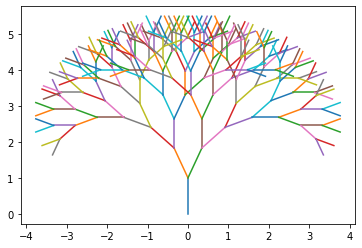

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def new_branch():
    b_length = 1
    b_start = np.array([[0., 0.]])
    b_angel = np.array([np.pi/2])
    b_end = np.empty_like(b_start)
    b_end[:,0] = b_start[:,0] + b_length*np.cos(b_angel)
    b_end[:,1] = b_start[:,1] + b_length*np.sin(b_angel)
    yield b_start, b_end
    while True:
        branching_angle = np.pi/8
        b_length = b_length*.9
        b_start = np.repeat(b_end,2,axis=0)
        b_angel = np.repeat(b_angel,2,axis=0)
        for i in range(np.size(b_angel)):
            b_angel[i] = b_angel[i] + (-1)**i*branching_angle
        b_end = np.empty_like(b_start)
        b_end[:,0] = b_start[:,0] + b_length*np.cos(b_angel)
        b_end[:,1] = b_start[:,1] + b_length*np.sin(b_angel)
        yield b_start, b_end

def draw_branches(b_start, b_end):
    for i in range(np.size(b_start[:,0])):
        x = [b_start[i,0], b_end[i,0]]
        y = [b_start[i,1], b_end[i,1]]
        plt.plot(x,y)
    
branch_gen = new_branch()

b_start, b_end = next(branch_gen)
draw_branches(b_start, b_end)

b_start, b_end = next(branch_gen)
draw_branches(b_start, b_end)

b_start, b_end = next(branch_gen)
draw_branches(b_start, b_end)

b_start, b_end = next(branch_gen)
draw_branches(b_start, b_end)

b_start, b_end = next(branch_gen)
draw_branches(b_start, b_end)

b_start, b_end = next(branch_gen)
draw_branches(b_start, b_end)

b_start, b_end = next(branch_gen)
draw_branches(b_start, b_end)

b_start, b_end = next(branch_gen)
draw_branches(b_start, b_end)

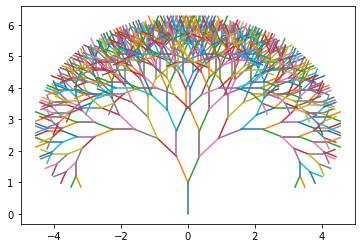

In [59]:
branch_gen = new_branch()

for num in range(10):
    b_start, b_end = next(branch_gen)
    draw_branches(b_start, b_end)